# 🏠 딥러닝을 이용한 회귀분석 - Boston Housing 가격 예측

## 🎯 프로젝트 개요

### 📋 목표
- **딥러닝 신경망**을 활용한 **회귀(Regression)** 문제 해결
- **Boston Housing 데이터셋**으로 주택 가격 예측 모델 구축
- **TensorFlow/Keras 최신 권장 방식** 적용 (경고 없는 클린 코드)
- 딥러닝 모델의 **설계, 훈련, 평가** 전 과정 경험

### 🔍 학습 목표
1. **회귀 문제**에서의 딥러닝 적용 방법 이해
2. **데이터 전처리**의 중요성과 기법 습득
3. **신경망 아키텍처** 설계 원리 학습
4. **모델 성능 평가** 및 **시각화** 기법 마스터
5. **TensorFlow/Keras 최신 API** 활용법 습득

### 📊 예상 결과
- 평균 절대 오차(MAE) **3-5** 달성 목표
- 실제값과 예측값 간 **상관계수 0.8 이상**
- 과적합 없는 **안정적인 학습 곡선**

---
**💡 Note**: 이 프로젝트는 딥러닝의 회귀 적용 사례로, 분류 문제와의 차이점을 명확히 보여줍니다.


## 📚 1. Boston Housing 데이터셋 이해

### 🏘️ 데이터셋 배경
- **시기**: 1970년대 보스턴 지역 주택 시장 데이터
- **목적**: 지역별 주택 가격 중앙값 예측
- **규모**: **506개 지역**, **13개 특성변수**
- **타겟**: 주택 가격 중앙값 (단위: $1,000)

### 📋 주요 특성변수 (Features) 상세 설명

| 변수명 | 의미 | 설명 | 범위/단위 |
|--------|------|------|-----------|
| **CRIM** | 범죄율 | 지역별 1인당 범죄 발생률 | 0.00632 ~ 88.9762 |
| **ZN** | 대형 주거지 비율 | 25,000 sq.ft 이상 주거용지 비율 | 0 ~ 100 (%) |
| **INDUS** | 비소매 상업지역 비율 | 비소매업 상업 지역 면적 비율 | 0.46 ~ 27.74 (%) |
| **CHAS** | 찰스강 인접 여부 | 찰스강에 인접=1, 아니면=0 | 0 또는 1 |
| **NOX** | 질소산화물 농도 | 일산화질소 농도 (대기오염 지표) | 0.385 ~ 0.871 (ppm) |
| **RM** | 평균 방 개수 | 주택당 평균 방의 개수 | 3.561 ~ 8.780 (개) |
| **AGE** | 노후 주택 비율 | 1940년 이전 건축 주택 비율 | 2.9 ~ 100 (%) |
| **DIS** | 고용센터 거리 | 5개 주요 고용센터까지 가중평균거리 | 1.1296 ~ 12.1265 |
| **RAD** | 방사형 도로 접근성 | 방사형 고속도로 접근성 지수 | 1 ~ 24 |
| **TAX** | 재산세율 | $10,000당 재산세율 | 187 ~ 711 |
| **PTRATIO** | 학생-교사 비율 | 지역 내 학생-교사 비율 | 12.6 ~ 22.0 |
| **B** | 흑인 거주 비율 | 1000(Bk - 0.63)² (Bk: 흑인 비율) | 0.32 ~ 396.90 |
| **LSTAT** | 하위계층 비율 | 하위계층 인구 비율 | 1.73 ~ 37.97 (%) |

### 🎯 타겟 변수 (Target)
- **MEDV**: 주택 가격 중앙값 ($1,000 단위)
- **범위**: $5,000 ~ $50,000
- **평균**: 약 $22,500
- **특징**: 연속형 수치 변수 (회귀 문제)

### 💡 데이터셋의 특징
1. **균형잡힌 크기**: 과소적합/과적합 방지에 적절한 샘플 수
2. **다양한 특성**: 경제적, 사회적, 환경적 요인 모두 포함
3. **실제 데이터**: 실제 부동산 시장의 복잡성 반영
4. **벤치마크 데이터**: 머신러닝 알고리즘 비교 연구에 자주 사용

### ⚠️ 데이터셋 한계점
- **시대적 제약**: 1970년대 데이터로 현재와 차이 존재
- **지역적 제약**: 보스턴 지역에 한정
- **사회적 편향**: 일부 변수에 당시 사회적 편견 반영


## 🔧 2. 환경 설정 및 데이터 로드

### 📦 필수 라이브러리
- **TensorFlow**: 딥러닝 프레임워크
- **NumPy**: 수치 연산 및 배열 처리
- **Matplotlib**: 데이터 시각화
- **Pandas**: 데이터 분석 (선택적)
- **Scikit-learn**: 데이터 전처리

### 💡 라이브러리별 역할
- **TensorFlow/Keras**: 신경망 모델 구축 및 훈련
- **boston_housing**: 내장 데이터셋 로드
- **Normalizer**: 데이터 정규화
- **Matplotlib**: 훈련 과정 및 결과 시각화


In [10]:
# ===========================
# 🔧 라이브러리 Import 및 환경 설정
# ===========================

# 핵심 라이브러리
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import warnings

# TensorFlow/Keras 모듈
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers

# Scikit-learn 전처리
from sklearn.preprocessing import Normalizer

# 경고 메시지 필터링 (선택적)
warnings.filterwarnings('ignore', category=UserWarning)

# 버전 정보 출력
print("🔍 환경 정보:")
print(f"  - TensorFlow 버전: {tf.__version__}")
print(f"  - NumPy 버전: {np.__version__}")
print(f"  - Python 버전: {tf.version.VERSION}")

# 한글 폰트 설정 (OS별 최적화)
import platform

# OS별 한글 폰트 자동 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = ['Malgun Gothic', 'DejaVu Sans']
    font_name = 'Malgun Gothic (맑은 고딕)'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = ['AppleGothic', 'DejaVu Sans'] 
    font_name = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = ['DejaVu Sans']
    font_name = 'DejaVu Sans'

plt.rcParams['axes.unicode_minus'] = False

print("✅ 라이브러리 로드 완료!")
print(f"   🎨 폰트 설정: {font_name} (OS: {platform.system()})")

# ===========================
# 📊 데이터셋 로드 및 기본 정보
# ===========================

print("\n📂 Boston Housing 데이터셋 로딩...")

# 데이터셋 로드
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print("\n✅ 데이터 로드 성공!")
print("\n📋 데이터셋 구조:")
print(f"  📈 훈련 데이터: {X_train.shape} (특성: {X_train.shape[1]}개)")
print(f"  🎯 훈련 타겟: {y_train.shape}")
print(f"  📈 테스트 데이터: {X_test.shape}")  
print(f"  🎯 테스트 타겟: {y_test.shape}")
print(f"  📊 전체 샘플: {X_train.shape[0] + X_test.shape[0]}개")
print(f"  🔢 특성 개수: {X_train.shape[1]}개")

# 데이터 타입 및 메모리 사용량 확인
print(f"\n💾 메모리 정보:")
print(f"  - X_train 데이터 타입: {X_train.dtype}")
print(f"  - y_train 데이터 타입: {y_train.dtype}")
print(f"  - X_train 메모리: {X_train.nbytes / 1024:.2f} KB")
print(f"  - y_train 메모리: {y_train.nbytes / 1024:.2f} KB")

# 훈련/테스트 분할 비율
train_ratio = X_train.shape[0] / (X_train.shape[0] + X_test.shape[0])
test_ratio = X_test.shape[0] / (X_train.shape[0] + X_test.shape[0])
print(f"\n📊 데이터 분할:")
print(f"  - 훈련 데이터: {train_ratio:.1%}")
print(f"  - 테스트 데이터: {test_ratio:.1%}")

print("\n" + "="*60)


🔍 환경 정보:
  - TensorFlow 버전: 2.19.0
  - NumPy 버전: 2.1.3
  - Python 버전: 2.19.0
✅ 라이브러리 로드 완료!
   🎨 폰트 설정: Malgun Gothic (맑은 고딕) (OS: Windows)

📂 Boston Housing 데이터셋 로딩...

✅ 데이터 로드 성공!

📋 데이터셋 구조:
  📈 훈련 데이터: (404, 13) (특성: 13개)
  🎯 훈련 타겟: (404,)
  📈 테스트 데이터: (102, 13)
  🎯 테스트 타겟: (102,)
  📊 전체 샘플: 506개
  🔢 특성 개수: 13개

💾 메모리 정보:
  - X_train 데이터 타입: float64
  - y_train 데이터 타입: float64
  - X_train 메모리: 41.03 KB
  - y_train 메모리: 3.16 KB

📊 데이터 분할:
  - 훈련 데이터: 79.8%
  - 테스트 데이터: 20.2%



## 🔍 3. 탐색적 데이터 분석 (EDA: Exploratory Data Analysis)

### 📊 데이터 분석의 중요성
1. **데이터 품질 확인**: 결측값, 이상치, 데이터 타입 점검
2. **분포 파악**: 특성별 분포와 타겟 변수 분포 이해
3. **상관관계 분석**: 특성 간, 특성-타겟 간 관계 파악
4. **전처리 방향 결정**: 정규화, 스케일링 필요성 판단

### 🎯 분석 목표
- 주택 가격에 **영향을 미치는 주요 요인** 파악
- **데이터 전처리** 필요성 확인
- **모델링 전략** 수립을 위한 인사이트 도출


In [11]:
# ===========================
# 🔍 탐색적 데이터 분석 (EDA)
# ===========================

print("🔍 데이터 기본 정보 분석 시작...\n")

# 1. 기본 통계 정보
print("📊 1. 특성 데이터 기본 통계:")
print(f"   🔢 최솟값: {X_train.min():.2f}")
print(f"   📈 최댓값: {X_train.max():.2f}")  
print(f"   📊 평균: {X_train.mean():.2f}")
print(f"   📏 표준편차: {X_train.std():.2f}")

# 2. 타겟 변수(주택 가격) 분석
print(f"\n🏠 2. 주택 가격 분포 분석:")
print(f"   💰 최저 가격: ${y_train.min():.1f}k")
print(f"   💸 최고 가격: ${y_train.max():.1f}k")
print(f"   💵 평균 가격: ${y_train.mean():.1f}k")
print(f"   📊 중앙값: ${np.median(y_train):.1f}k")
print(f"   📏 표준편차: ${y_train.std():.1f}k")

# 3. 결측값 확인
missing_count_X = np.sum(pd.isnull(X_train))
missing_count_y = np.sum(pd.isnull(y_train))
print(f"\n🔍 3. 결측값 검사:")
print(f"   특성 데이터 결측값: {missing_count_X}개")
print(f"   타겟 데이터 결측값: {missing_count_y}개")
if missing_count_X == 0 and missing_count_y == 0:
    print("   ✅ 결측값 없음 - 깔끔한 데이터!")

# 4. 특성별 범위 및 스케일 차이 분석
print(f"\n📏 4. 특성별 스케일 차이 분석:")

# 특성별 최대/최소 범위 계산
feature_ranges = []
feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]

for i in range(X_train.shape[1]):
    min_val = X_train[:, i].min()
    max_val = X_train[:, i].max()
    range_val = max_val - min_val
    feature_ranges.append(range_val)
    print(f"   {feature_names[i]:>8}: [{min_val:6.2f}, {max_val:6.2f}] (범위: {range_val:6.2f})")

# 스케일 차이 정도 분석
max_range = max(feature_ranges)
min_range = min(feature_ranges)
scale_ratio = max_range / min_range
print(f"\n📊 스케일 차이:")
print(f"   최대 범위: {max_range:.2f}")
print(f"   최소 범위: {min_range:.2f}")
print(f"   스케일 차이 비율: {scale_ratio:.1f}:1")

if scale_ratio > 100:
    print("   ⚠️  매우 큰 스케일 차이 → 정규화 필수!")
elif scale_ratio > 10:
    print("   🔔 상당한 스케일 차이 → 정규화 권장")
else:
    print("   ✅ 적당한 스케일 차이")

print("\n" + "="*60)


🔍 데이터 기본 정보 분석 시작...

📊 1. 특성 데이터 기본 통계:
   🔢 최솟값: 0.00
   📈 최댓값: 711.00
   📊 평균: 69.79
   📏 표준편차: 144.39

🏠 2. 주택 가격 분포 분석:
   💰 최저 가격: $5.0k
   💸 최고 가격: $50.0k
   💵 평균 가격: $22.4k
   📊 중앙값: $20.8k
   📏 표준편차: $9.2k

🔍 3. 결측값 검사:
   특성 데이터 결측값: 0개
   타겟 데이터 결측값: 0개
   ✅ 결측값 없음 - 깔끔한 데이터!

📏 4. 특성별 스케일 차이 분석:
       CRIM: [  0.01,  88.98] (범위:  88.97)
         ZN: [  0.00, 100.00] (범위: 100.00)
      INDUS: [  0.46,  27.74] (범위:  27.28)
       CHAS: [  0.00,   1.00] (범위:   1.00)
        NOX: [  0.39,   0.87] (범위:   0.49)
         RM: [  3.56,   8.72] (범위:   5.16)
        AGE: [  2.90, 100.00] (범위:  97.10)
        DIS: [  1.13,  10.71] (범위:   9.58)
        RAD: [  1.00,  24.00] (범위:  23.00)
        TAX: [188.00, 711.00] (범위: 523.00)
    PTRATIO: [ 12.60,  22.00] (범위:   9.40)
          B: [  0.32, 396.90] (범위: 396.58)
      LSTAT: [  1.73,  37.97] (범위:  36.24)

📊 스케일 차이:
   최대 범위: 523.00
   최소 범위: 0.49
   스케일 차이 비율: 1076.1:1
   ⚠️  매우 큰 스케일 차이 → 정규화 필수!



📈 데이터 시각화 및 분포 분석 시작...



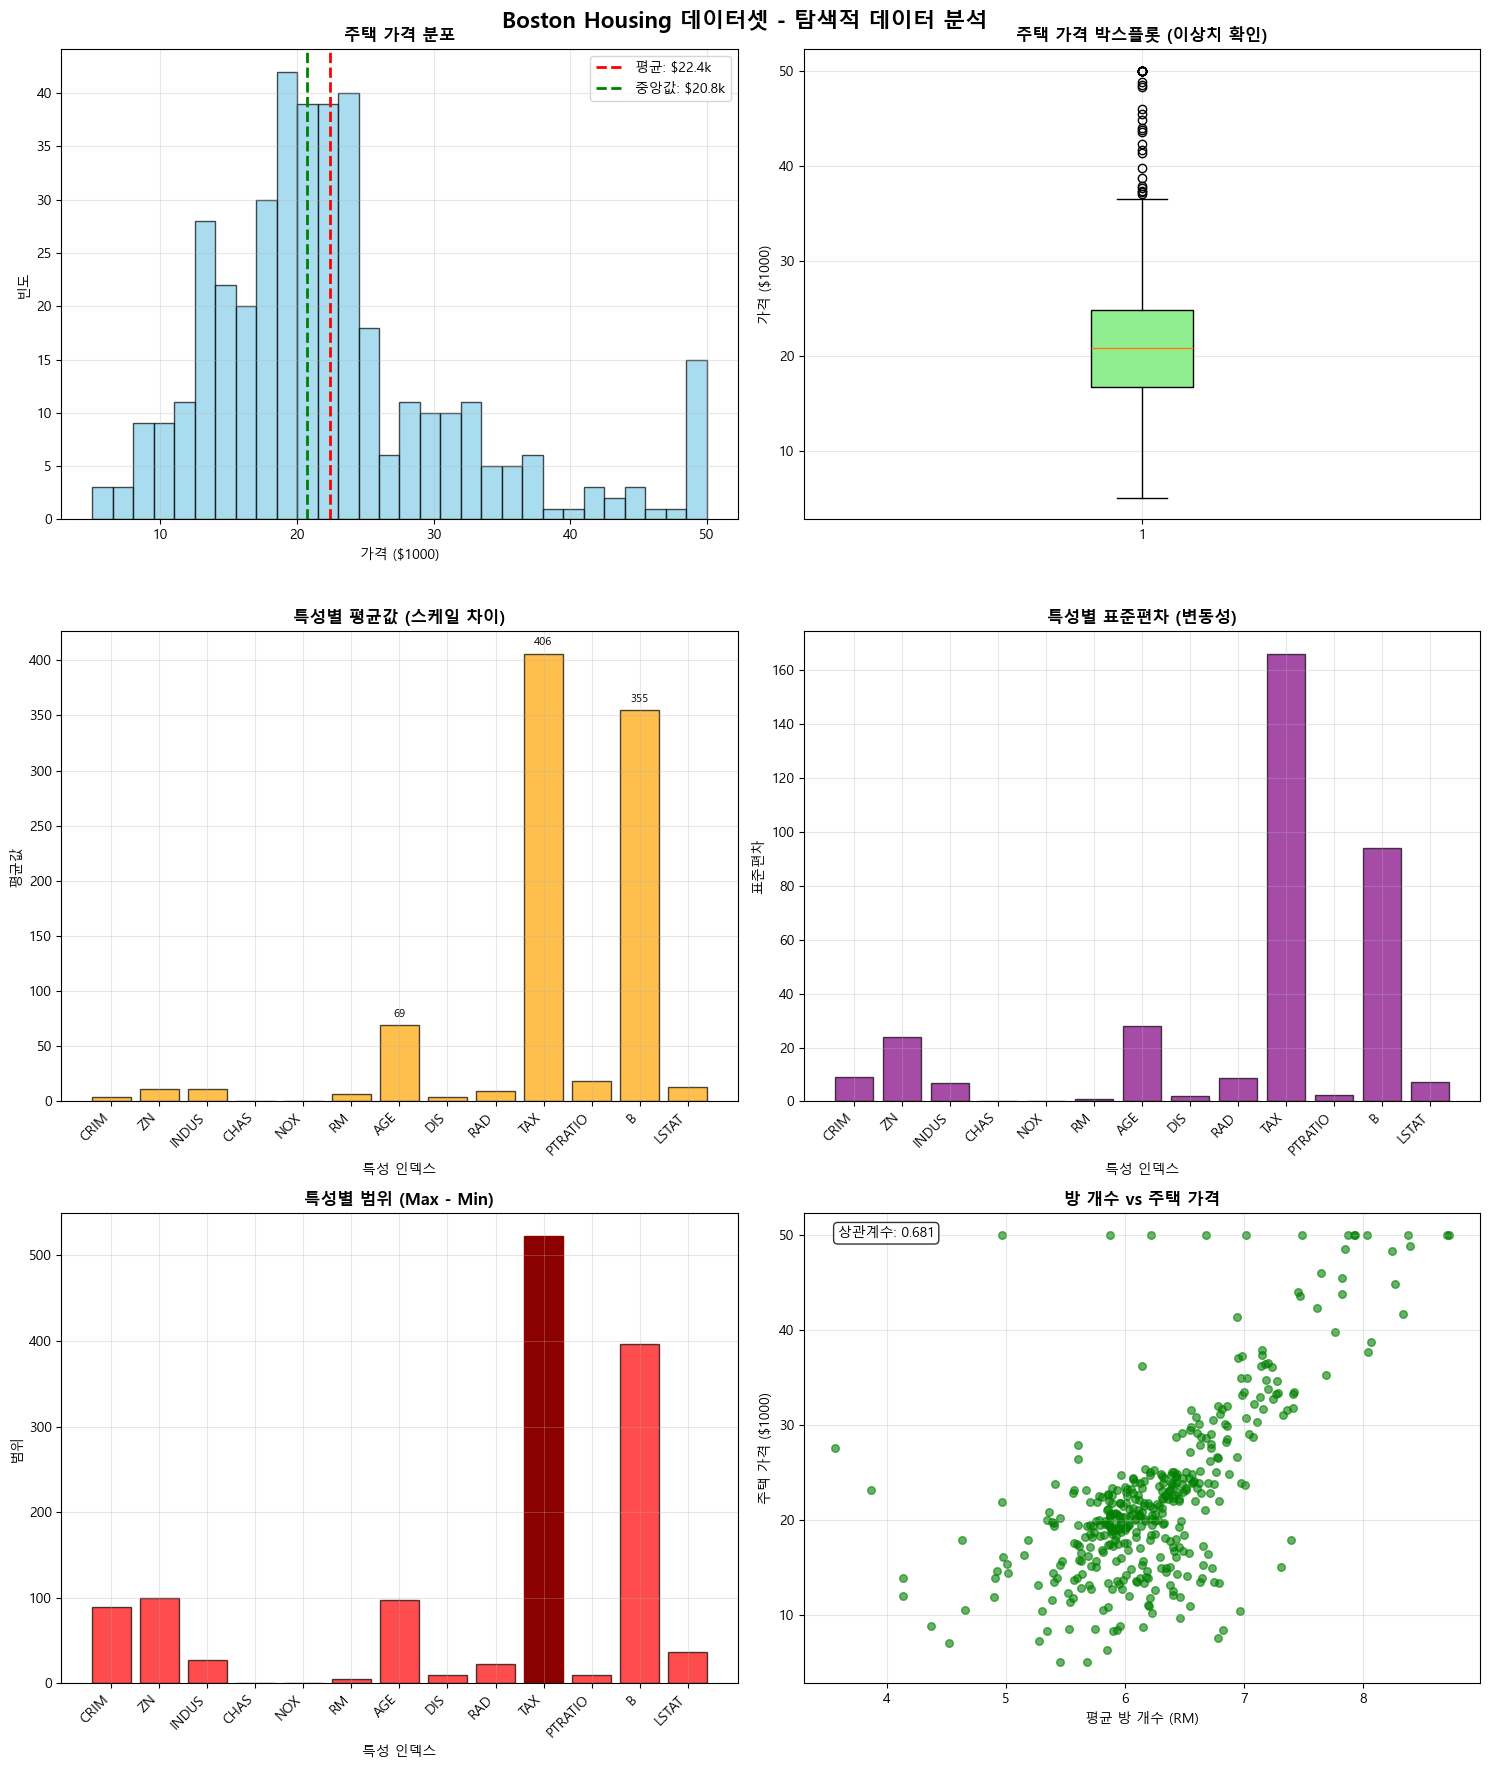


🎓 EDA 분석 결과 요약

📊 주요 발견사항:
   • 주택 가격 범위: $5.0k ~ $50.0k
   • 가격 분포: 약간 오른쪽 치우침 (평균 > 중앙값)
   • 스케일 차이: 1076.1:1 → 정규화 필요
   • 결측값: 없음 → 추가 처리 불필요

🔍 특성 분석:
   • 가장 큰 범위: TAX (523.0)
   • 방 개수-가격 상관관계: 0.681 (양의 상관관계)

💡 전처리 방향:
   ✅ 정규화 필수: 특성 간 스케일 차이가 매우 큼
   ✅ 결측값 처리 불필요: 깔끔한 데이터
   ✅ 이상치 확인: 박스플롯에서 일부 이상치 존재하나 자연스러운 범위



In [12]:
# ===========================
# 📊 데이터 시각화 및 분포 분석
# ===========================

print("📈 데이터 시각화 및 분포 분석 시작...\n")

# 대형 시각화 설정 (3x2 레이아웃)
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Boston Housing 데이터셋 - 탐색적 데이터 분석', fontsize=16, fontweight='bold', y=0.98)

# 1. 주택 가격 히스토그램
axes[0, 0].hist(y_train, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(y_train.mean(), color='red', linestyle='--', linewidth=2, label=f'평균: ${y_train.mean():.1f}k')
axes[0, 0].axvline(np.median(y_train), color='green', linestyle='--', linewidth=2, label=f'중앙값: ${np.median(y_train):.1f}k')
axes[0, 0].set_title('주택 가격 분포', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('가격 ($1000)')
axes[0, 0].set_ylabel('빈도')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. 주택 가격 박스플롯
box_plot = axes[0, 1].boxplot(y_train, patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightgreen')
axes[0, 1].set_title('주택 가격 박스플롯 (이상치 확인)', fontweight='bold', fontsize=12)
axes[0, 1].set_ylabel('가격 ($1000)')
axes[0, 1].grid(True, alpha=0.3)

# 3. 특성별 평균값 (스케일 차이 시각화)
feature_means = [X_train[:, i].mean() for i in range(X_train.shape[1])]
bars = axes[1, 0].bar(range(len(feature_names)), feature_means, color='orange', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('특성별 평균값 (스케일 차이)', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('특성 인덱스')
axes[1, 0].set_ylabel('평균값')
axes[1, 0].set_xticks(range(len(feature_names)))
axes[1, 0].set_xticklabels(feature_names, rotation=45, ha='right')
axes[1, 0].grid(True, alpha=0.3)

# 특성별 평균값 표시
for i, (bar, mean_val) in enumerate(zip(bars, feature_means)):
    if mean_val > 50:  # 큰 값만 표시
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 5,
                        f'{mean_val:.0f}', ha='center', va='bottom', fontsize=8)

# 4. 특성별 표준편차 (변동성 분석)
feature_stds = [X_train[:, i].std() for i in range(X_train.shape[1])]
axes[1, 1].bar(range(len(feature_names)), feature_stds, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('특성별 표준편차 (변동성)', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('특성 인덱스')
axes[1, 1].set_ylabel('표준편차')
axes[1, 1].set_xticks(range(len(feature_names)))
axes[1, 1].set_xticklabels(feature_names, rotation=45, ha='right')
axes[1, 1].grid(True, alpha=0.3)

# 5. 특성별 범위 (Min-Max 범위)
feature_ranges_viz = [X_train[:, i].max() - X_train[:, i].min() for i in range(X_train.shape[1])]
bars_range = axes[2, 0].bar(range(len(feature_names)), feature_ranges_viz, color='red', alpha=0.7, edgecolor='black')
axes[2, 0].set_title('특성별 범위 (Max - Min)', fontweight='bold', fontsize=12)
axes[2, 0].set_xlabel('특성 인덱스')
axes[2, 0].set_ylabel('범위')
axes[2, 0].set_xticks(range(len(feature_names)))
axes[2, 0].set_xticklabels(feature_names, rotation=45, ha='right')
axes[2, 0].grid(True, alpha=0.3)

# 가장 큰 범위를 가진 특성 강조
max_range_idx = np.argmax(feature_ranges_viz)
bars_range[max_range_idx].set_color('darkred')
bars_range[max_range_idx].set_alpha(1.0)

# 6. 주요 특성과 주택 가격 간 산점도 (RM: 방 개수)
rm_index = 5  # RM은 6번째 특성 (인덱스 5)
scatter = axes[2, 1].scatter(X_train[:, rm_index], y_train, alpha=0.6, color='green', s=30)
axes[2, 1].set_title('방 개수 vs 주택 가격', fontweight='bold', fontsize=12)
axes[2, 1].set_xlabel('평균 방 개수 (RM)')
axes[2, 1].set_ylabel('주택 가격 ($1000)')
axes[2, 1].grid(True, alpha=0.3)

# 상관계수 계산 및 표시
correlation_rm = np.corrcoef(X_train[:, rm_index], y_train)[0, 1]
axes[2, 1].text(0.05, 0.95, f'상관계수: {correlation_rm:.3f}', 
                transform=axes[2, 1].transAxes, fontsize=10,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# 분석 결과 요약
print("\n" + "="*60)
print("🎓 EDA 분석 결과 요약")
print("="*60)

print(f"\n📊 주요 발견사항:")
print(f"   • 주택 가격 범위: ${y_train.min():.1f}k ~ ${y_train.max():.1f}k")
print(f"   • 가격 분포: 약간 오른쪽 치우침 (평균 > 중앙값)")
print(f"   • 스케일 차이: {scale_ratio:.1f}:1 → 정규화 필요")
print(f"   • 결측값: 없음 → 추가 처리 불필요")

print(f"\n🔍 특성 분석:")
max_range_feature = feature_names[max_range_idx]
print(f"   • 가장 큰 범위: {max_range_feature} ({feature_ranges_viz[max_range_idx]:.1f})")
print(f"   • 방 개수-가격 상관관계: {correlation_rm:.3f} (양의 상관관계)")

print(f"\n💡 전처리 방향:")
print(f"   ✅ 정규화 필수: 특성 간 스케일 차이가 매우 큼")
print(f"   ✅ 결측값 처리 불필요: 깔끔한 데이터")
print(f"   ✅ 이상치 확인: 박스플롯에서 일부 이상치 존재하나 자연스러운 범위")

print("\n" + "="*60)


## 🔧 4. 데이터 전처리 (Data Preprocessing)

### 📊 전처리의 필요성
EDA 결과 확인된 **스케일 차이**를 해결하기 위한 정규화가 필수입니다.

### 🎯 정규화 방법 선택: **Normalizer**

#### 📋 Normalizer의 특징
- 각 **샘플(행)을 단위 벡터로 변환** (L2 norm = 1)
- **특성 간 상대적 관계 유지**
- **이상치에 상대적으로 견고함**
- 딥러닝에서 **수렴 안정성** 향상

#### 🔄 변환 과정
1. **훈련 데이터**: `fit_transform()` - 변환 규칙 학습 + 적용
2. **테스트 데이터**: `transform()` - 동일한 규칙 적용 (Data Leakage 방지)

#### ⚡ 딥러닝에서의 장점
- **기울기 소실/폭발 문제** 완화
- **가중치 초기화** 효과 향상
- **학습 속도** 개선


🔄 데이터 정규화 과정 시작...

📐 정규화 방법: L2 Normalization (각 샘플을 단위 벡터로 변환)

🎯 1. 훈련 데이터 정규화 (fit_transform)
   정규화 전 형태: (404, 13)
   정규화 전 범위: [0.00, 711.00]
   정규화 후 형태: (404, 13)
   정규화 후 범위: [0.00, 0.99]

🎯 2. 테스트 데이터 정규화 (transform only)
   정규화 전 형태: (102, 13)
   정규화 전 범위: [0.00, 711.00]
   정규화 후 형태: (102, 13)
   정규화 후 범위: [0.00, 0.99]

🔍 3. 정규화 효과 검증:
   훈련 데이터 처음 5개 샘플의 L2 norm:
     샘플 1: 1.000000
     샘플 2: 1.000000
     샘플 3: 1.000000
     샘플 4: 1.000000
     샘플 5: 1.000000
   테스트 데이터 처음 5개 샘플의 L2 norm:
     샘플 1: 1.000000
     샘플 2: 1.000000
     샘플 3: 1.000000
     샘플 4: 1.000000
     샘플 5: 1.000000

📊 정규화 품질 평가:
   훈련 데이터 평균 L2 norm: 1.000000
   테스트 데이터 평균 L2 norm: 1.000000
   ✅ 정규화 성공: 모든 샘플이 단위 벡터로 변환됨

📈 4. 정규화 효과 시각화:


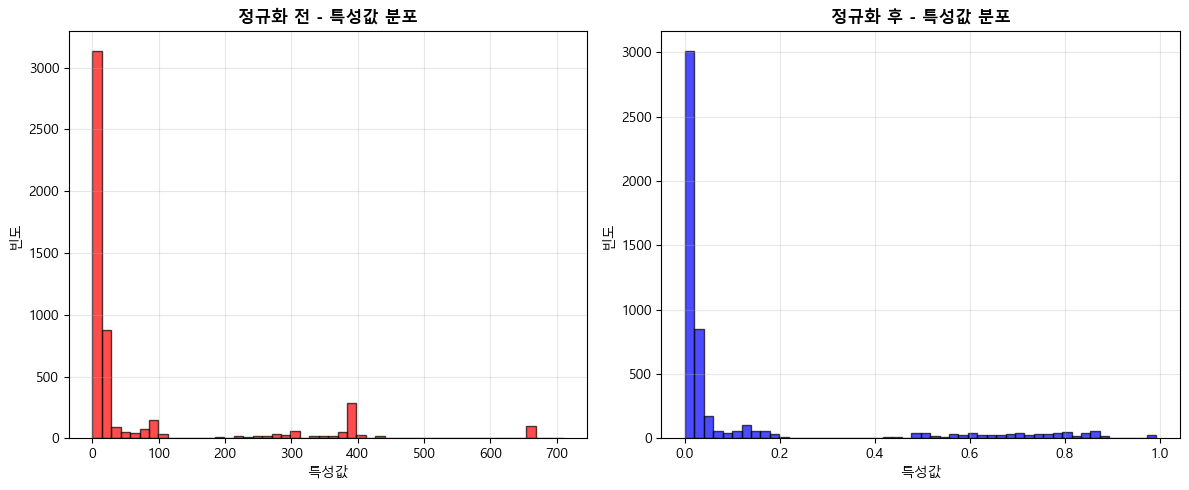


💾 메모리 사용량:
   원본 데이터: 51.39 KB
   정규화 데이터: 51.39 KB
   추가 메모리: 0.00 KB

✅ 데이터 전처리 완료!
   🎯 다음 단계: 신경망 모델 설계



In [13]:
# ===========================
# 🔧 데이터 정규화 (Normalization)
# ===========================

print("🔄 데이터 정규화 과정 시작...\n")

# Normalizer 객체 생성
normalizer = Normalizer(norm='l2')  # L2 정규화 명시
print("📐 정규화 방법: L2 Normalization (각 샘플을 단위 벡터로 변환)")

# ===========================
# 1. 훈련 데이터 정규화
# ===========================
print("\n🎯 1. 훈련 데이터 정규화 (fit_transform)")
print(f"   정규화 전 형태: {X_train.shape}")
print(f"   정규화 전 범위: [{X_train.min():.2f}, {X_train.max():.2f}]")

X_train_scaled = normalizer.fit_transform(X_train)

print(f"   정규화 후 형태: {X_train_scaled.shape}")
print(f"   정규화 후 범위: [{X_train_scaled.min():.2f}, {X_train_scaled.max():.2f}]")

# ===========================
# 2. 테스트 데이터 정규화
# ===========================
print(f"\n🎯 2. 테스트 데이터 정규화 (transform only)")
print(f"   정규화 전 형태: {X_test.shape}")
print(f"   정규화 전 범위: [{X_test.min():.2f}, {X_test.max():.2f}]")

X_test_scaled = normalizer.transform(X_test)  # fit은 훈련 데이터에만!

print(f"   정규화 후 형태: {X_test_scaled.shape}")
print(f"   정규화 후 범위: [{X_test_scaled.min():.2f}, {X_test_scaled.max():.2f}]")

# ===========================
# 3. 정규화 효과 검증
# ===========================
print(f"\n🔍 3. 정규화 효과 검증:")

# L2 norm 확인 (1에 가까워야 함)
sample_norms_train = np.linalg.norm(X_train_scaled[:5], axis=1)
sample_norms_test = np.linalg.norm(X_test_scaled[:5], axis=1)

print(f"   훈련 데이터 처음 5개 샘플의 L2 norm:")
for i, norm in enumerate(sample_norms_train):
    print(f"     샘플 {i+1}: {norm:.6f}")

print(f"   테스트 데이터 처음 5개 샘플의 L2 norm:")
for i, norm in enumerate(sample_norms_test):
    print(f"     샘플 {i+1}: {norm:.6f}")

# 정규화 품질 평가
avg_norm_train = np.mean(np.linalg.norm(X_train_scaled, axis=1))
avg_norm_test = np.mean(np.linalg.norm(X_test_scaled, axis=1))

print(f"\n📊 정규화 품질 평가:")
print(f"   훈련 데이터 평균 L2 norm: {avg_norm_train:.6f}")
print(f"   테스트 데이터 평균 L2 norm: {avg_norm_test:.6f}")

if abs(avg_norm_train - 1.0) < 0.001 and abs(avg_norm_test - 1.0) < 0.001:
    print("   ✅ 정규화 성공: 모든 샘플이 단위 벡터로 변환됨")
else:
    print("   ⚠️  정규화 확인 필요")

# ===========================
# 4. 정규화 전후 비교 시각화
# ===========================
print(f"\n📈 4. 정규화 효과 시각화:")

# 간단한 비교 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 정규화 전 특성값 분포
axes[0].hist(X_train.flatten(), bins=50, alpha=0.7, color='red', edgecolor='black')
axes[0].set_title('정규화 전 - 특성값 분포', fontweight='bold')
axes[0].set_xlabel('특성값')
axes[0].set_ylabel('빈도')
axes[0].grid(True, alpha=0.3)

# 정규화 후 특성값 분포
axes[1].hist(X_train_scaled.flatten(), bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[1].set_title('정규화 후 - 특성값 분포', fontweight='bold')
axes[1].set_xlabel('특성값')
axes[1].set_ylabel('빈도')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===========================
# 5. 메모리 사용량 비교
# ===========================
memory_original = X_train.nbytes + X_test.nbytes
memory_scaled = X_train_scaled.nbytes + X_test_scaled.nbytes

print(f"\n💾 메모리 사용량:")
print(f"   원본 데이터: {memory_original / 1024:.2f} KB")
print(f"   정규화 데이터: {memory_scaled / 1024:.2f} KB")
print(f"   추가 메모리: {(memory_scaled - memory_original) / 1024:.2f} KB")

print("\n✅ 데이터 전처리 완료!")
print("   🎯 다음 단계: 신경망 모델 설계")
print("\n" + "="*60)


## 🧠 5. 신경망 모델 설계 (Neural Network Architecture)

### 🎯 회귀 문제를 위한 신경망 설계 원칙

#### 🏗️ 아키텍처 설계 전략

##### 📥 **입력층 (Input Layer)**
- **입력 차원**: 13개 (Boston Housing 특성 수)
- **⭐ 최신 방식**: `Input()` 레이어 명시적 사용 (경고 해결)

##### 🔀 **은닉층 (Hidden Layers)**
- **구조**: 점진적 축소 (512 → 256 → 128 → 64)
- **활성화 함수**: ReLU (Rectified Linear Unit)
- **층수**: 4개 (충분한 표현력 확보)

##### 📤 **출력층 (Output Layer)**  
- **뉴런 수**: 1개 (회귀 문제)
- **활성화 함수**: 없음 (선형 출력)

#### ⚡ 설계 철학

| 요소 | 선택 | 이유 |
|------|------|------|
| **점진적 축소** | 512→256→128→64 | 복잡한 패턴을 단계적 추상화 |
| **ReLU 활성화** | 모든 은닉층 | 기울기 소실 문제 해결, 계산 효율성 |
| **선형 출력** | 출력층 | 연속값 예측 (회귀 특성) |
| **충분한 용량** | 총 21만+ 파라미터 | 과소적합 방지 |

#### 📐 모델 컴파일 설정

| 구성요소 | 선택 | 특징 |
|----------|------|------|
| **손실함수** | MSE | 회귀 표준, 큰 오차에 큰 패널티 |
| **옵티마이저** | RMSprop | 적응적 학습률, 안정적 수렴 |
| **평가지표** | MAE | 해석하기 쉬운 절대오차 |

#### ⚠️ **TensorFlow/Keras 최신 권장 방식**

##### ❌ 구식 방법 (경고 발생)
```python
layers.Dense(512, activation='relu', input_shape=(13,))
```

##### ✅ 최신 방법 (경고 없음)
```python
model.add(layers.Input(shape=(13,)))
model.add(layers.Dense(512, activation='relu'))
```


In [14]:
# ===========================
# 🏗️ 신경망 모델 구현 (최신 권장 방식)
# ===========================

def create_regression_model(input_dim=13):
    """
    회귀 문제를 위한 딥러닝 모델 생성
    
    ⭐ 최신 TensorFlow/Keras 권장 방식 적용:
    - Input 레이어 명시적 사용으로 경고 해결
    - 점진적 축소 아키텍처로 효율적 학습
    - 회귀 문제에 최적화된 설정
    
    Args:
        input_dim (int): 입력 특성의 차원 수 (기본값: 13)
    
    Returns:
        tf.keras.Model: 컴파일된 신경망 모델
    """
    
    print("🏗️ 신경망 모델 구성 중...")
    print(f"   입력 차원: {input_dim}개 특성")
    
    # ===========================
    # 1. 모델 아키텍처 구성
    # ===========================
    
    # Sequential 모델 생성 (순차적 레이어 구조)
    model = models.Sequential(name='Boston_Housing_Regressor')
    
    # ⭐ 최신 권장 방식: Input 레이어 명시적 추가
    model.add(layers.Input(shape=(input_dim,), name='input_layer'))
    print("   ✅ 입력층: Input 레이어 명시적 추가 (경고 해결)")
    
    # 은닉층 1: 512개 뉴런
    model.add(layers.Dense(512, activation='relu', name='hidden_1'))
    print("   🔷 은닉층 1: 512개 뉴런 (ReLU)")
    
    # 은닉층 2: 256개 뉴런 (점진적 축소)
    model.add(layers.Dense(256, activation='relu', name='hidden_2'))
    print("   🔷 은닉층 2: 256개 뉴런 (ReLU)")
    
    # 은닉층 3: 128개 뉴런
    model.add(layers.Dense(128, activation='relu', name='hidden_3'))
    print("   🔷 은닉층 3: 128개 뉴런 (ReLU)")
    
    # 은닉층 4: 64개 뉴런
    model.add(layers.Dense(64, activation='relu', name='hidden_4'))
    print("   🔷 은닉층 4: 64개 뉴런 (ReLU)")
    
    # 출력층: 1개 뉴런 (회귀)
    model.add(layers.Dense(1, name='output'))
    print("   📤 출력층: 1개 뉴런 (선형 활성화)")
    
    # ===========================
    # 2. 모델 컴파일
    # ===========================
    
    model.compile(
        optimizer='rmsprop',    # 적응적 학습률 옵티마이저
        loss='mse',            # 평균제곱오차 (회귀 표준)
        metrics=['mae']        # 평균절대오차 (해석 용이)
    )
    
    print("   ⚙️ 컴파일 설정:")
    print("     - 옵티마이저: RMSprop")
    print("     - 손실함수: MSE (Mean Squared Error)")  
    print("     - 평가지표: MAE (Mean Absolute Error)")
    
    print("\n✅ 모델 구성 완료 - 경고 없음!")
    
    return model

# ===========================
# 모델 생성 및 구조 분석
# ===========================

print("🚀 회귀 신경망 모델 생성 시작...\n")

# 모델 생성
regression_model = create_regression_model()

# ===========================
# 모델 구조 상세 분석
# ===========================

print("\n" + "="*60)
print("📊 모델 아키텍처 상세 분석")
print("="*60)

# 모델 요약 출력
regression_model.summary()

# 상세 통계 계산
total_params = regression_model.count_params()
trainable_params = sum([tf.size(w).numpy() for w in regression_model.trainable_weights])

print(f"\n📈 모델 복잡도 분석:")
print(f"   🔢 총 레이어 수: {len(regression_model.layers)}개")
print(f"   📊 총 파라미터: {total_params:,}개")
print(f"   🎯 훈련 가능 파라미터: {trainable_params:,}개")
print(f"   💾 모델 크기 (추정): {total_params * 4 / 1024:.2f} KB")

# 데이터 대비 파라미터 비율
data_to_param_ratio = X_train.shape[0] / total_params
print(f"\n⚖️ 복잡도 평가:")
print(f"   📊 훈련 샘플 수: {X_train.shape[0]:,}개")
print(f"   🔢 데이터/파라미터 비율: {data_to_param_ratio:.2f}")

if data_to_param_ratio < 2:
    print("   ⚠️  파라미터가 매우 많음 → 과적합 위험 높음")
elif data_to_param_ratio < 5:
    print("   🔔 파라미터가 상당히 많음 → 과적합 주의")
else:
    print("   ✅ 적절한 파라미터 수")

# 레이어별 파라미터 분석
print(f"\n🔍 레이어별 파라미터 분석:")
for i, layer in enumerate(regression_model.layers):
    if hasattr(layer, 'count_params'):
        layer_params = layer.count_params()
        if layer_params > 0:
            print(f"   {layer.name}: {layer_params:,}개 파라미터")

print("\n✅ 모델 분석 완료!")
print("   🎯 다음 단계: 모델 훈련")
print("\n" + "="*60)


🚀 회귀 신경망 모델 생성 시작...

🏗️ 신경망 모델 구성 중...
   입력 차원: 13개 특성
   ✅ 입력층: Input 레이어 명시적 추가 (경고 해결)
   🔷 은닉층 1: 512개 뉴런 (ReLU)
   🔷 은닉층 2: 256개 뉴런 (ReLU)
   🔷 은닉층 3: 128개 뉴런 (ReLU)
   🔷 은닉층 4: 64개 뉴런 (ReLU)
   📤 출력층: 1개 뉴런 (선형 활성화)
   ⚙️ 컴파일 설정:
     - 옵티마이저: RMSprop
     - 손실함수: MSE (Mean Squared Error)
     - 평가지표: MAE (Mean Absolute Error)

✅ 모델 구성 완료 - 경고 없음!

📊 모델 아키텍처 상세 분석


Model: "Boston_Housing_Regressor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 512)            │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_4 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,713 (702.00 KB)

 Trainable params: 179,713 (702.00 KB)

 Non-trainable params: 0 (0.00 B)


📈 모델 복잡도 분석:
   🔢 총 레이어 수: 5개
   📊 총 파라미터: 179,713개
   🎯 훈련 가능 파라미터: 179,713개
   💾 모델 크기 (추정): 702.00 KB

⚖️ 복잡도 평가:
   📊 훈련 샘플 수: 404개
   🔢 데이터/파라미터 비율: 0.00
   ⚠️  파라미터가 매우 많음 → 과적합 위험 높음

🔍 레이어별 파라미터 분석:
   hidden_1: 7,168개 파라미터
   hidden_2: 131,328개 파라미터
   hidden_3: 32,896개 파라미터
   hidden_4: 8,256개 파라미터
   output: 65개 파라미터

✅ 모델 분석 완료!
   🎯 다음 단계: 모델 훈련



## 🚀 6. 모델 훈련 (Model Training)

### 📋 훈련 전략 설정

#### 🎛️ 하이퍼파라미터 설정
| 파라미터 | 값 | 선택 이유 |
|----------|-----|-----------|
| **에포크** | 10 | 작은 데이터셋에 적합, 과적합 방지 |
| **배치 크기** | 100 | 전체의 약 1/4, 안정적 학습 |
| **검증 분할** | 0.2 (20%) | 과적합 조기 감지 |

#### 📈 훈련 모니터링 지표
- **손실값 (Loss)**: MSE 감소 추이 관찰
- **MAE**: 실제 해석 가능한 오차 값
- **검증 성능**: 과적합 감지를 위한 핵심 지표

#### 🎯 예상 결과
- **정상적인 학습**: 손실값이 꾸준히 감소
- **과적합 방지**: 훈련/검증 성능 차이 최소화
- **목표 성능**: MAE 3-5 달성


In [15]:
# 🚀 모델 훈련 실행
import time

print("🚀 모델 훈련을 시작합니다!\n")
print("=" * 60)

# 훈련 설정
EPOCHS = 10
BATCH_SIZE = 100
VALIDATION_SPLIT = 0.2  # 훈련 데이터의 20%를 검증용으로 사용

print(f"📋 훈련 설정:")
print(f"  - 에포크 수: {EPOCHS}")
print(f"  - 배치 크기: {BATCH_SIZE}")
print(f"  - 검증 분할: {VALIDATION_SPLIT} ({int(X_train_scaled.shape[0] * VALIDATION_SPLIT)}개 샘플)")

# 훈련 시작 시간 기록
start_time = time.time()

print(f"\n⏰ 훈련 시작 시간: {time.strftime('%Y-%m-%d %H:%M:%S')}")
print("\n" + "="*60)

# 모델 훈련 실행
training_history = regression_model.fit(
    X_train_scaled, 
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    verbose=1,
    shuffle=True
)

# 훈련 완료 시간 계산
end_time = time.time()
training_time = end_time - start_time

print("\n" + "="*60)
print(f"✅ 훈련 완료!")
print(f"⏰ 총 훈련 시간: {training_time:.2f}초")
print(f"📊 에포크당 평균 시간: {training_time/EPOCHS:.2f}초")


🚀 모델 훈련을 시작합니다!

📋 훈련 설정:
  - 에포크 수: 10
  - 배치 크기: 100
  - 검증 분할: 0.2 (80개 샘플)

⏰ 훈련 시작 시간: 2025-07-20 00:11:34

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 552.1593 - mae: 21.6556 - val_loss: 554.4139 - val_mae: 21.6780
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 446.3536 - mae: 19.0834 - val_loss: 311.4212 - val_mae: 15.0871
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 238.7835 - mae: 12.0783 - val_loss: 102.2193 - val_mae: 6.8915
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 83.1152 - mae: 6.3689 - val_loss: 88.8863 - val_mae: 6.4183
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 74.2804 - mae: 6.0993 - val_loss: 81.2437 - val_mae: 7.1086
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 85.2979 - mae: 7.1190 - val_loss: 82.4748 - val_mae: 6.0739
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 69.9904 - mae: 5.7918 - val_loss: 77.6704 - val_mae: 7.0230
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 

In [16]:
# 📊 최종 모델 성능 평가
print("📊 최종 모델 성능 평가를 실시합니다\n")
print("=" * 60)

# 1. 훈련셋 성능 평가
print("🔍 1. 훈련 데이터 성능 평가:")
train_loss, train_mae = regression_model.evaluate(X_train_scaled, y_train, verbose=0)
print(f"   MSE (손실값): {train_loss:.4f}")
print(f"   MAE: {train_mae:.4f} → 평균 ${train_mae*1000:.0f} 오차")

# 2. 테스트셋 성능 평가 (가장 중요!)
print(f"\n🎯 2. 테스트 데이터 성능 평가 (일반화 성능):")
test_loss, test_mae = regression_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"   MSE (손실값): {test_loss:.4f}")
print(f"   MAE: {test_mae:.4f} → 평균 ${test_mae*1000:.0f} 오차")

# 3. 성능 비교 및 해석
print(f"\n📈 3. 성능 분석:")
performance_gap = test_mae - train_mae
print(f"   훈련 vs 테스트 MAE 차이: {performance_gap:.4f}")

if performance_gap > 1.0:
    print("   ⚠️  과적합 징후: 테스트 성능이 훈련 성능보다 현저히 낮음")
elif performance_gap < 0:
    print("   🤔 이상 현상: 테스트 성능이 훈련 성능보다 좋음")
else:
    print("   ✅ 건전한 학습: 적절한 성능 차이")

# 4. 성능 등급 평가
print(f"\n🏆 4. 성능 등급:")
if test_mae < 3.0:
    grade = "우수"
    emoji = "🥇"
elif test_mae < 4.0:
    grade = "양호"  
    emoji = "🥈"
elif test_mae < 5.0:
    grade = "보통"
    emoji = "🥉"
else:
    grade = "개선필요"
    emoji = "❌"

print(f"   {emoji} {grade} (테스트 MAE: {test_mae:.3f})")

# 5. 예측 결과 상세 분석
print(f"\n🔬 5. 개별 예측 결과 분석 (테스트 샘플 10개):")
predictions = regression_model.predict(X_test_scaled[:10], verbose=0)

print("   실제값   |   예측값   |   오차    |   오차율")
print("   " + "-" * 45)

total_error = 0
for i in range(10):
    actual = y_test[i]
    predicted = predictions[i][0]
    error = abs(actual - predicted)
    error_rate = (error / actual) * 100
    total_error += error
    
    print(f"   ${actual:6.1f}k | ${predicted:6.1f}k | ${error:5.1f}k | {error_rate:5.1f}%")

avg_error = total_error / 10
print(f"\n   평균 절대 오차: ${avg_error:.1f}k")
print(f"   이는 MAE {test_mae:.3f}과 유사한 수준입니다.")


📊 최종 모델 성능 평가를 실시합니다

🔍 1. 훈련 데이터 성능 평가:
   MSE (손실값): 68.3744
   MAE: 6.3638 → 평균 $6364 오차

🎯 2. 테스트 데이터 성능 평가 (일반화 성능):
   MSE (손실값): 64.2320
   MAE: 6.0037 → 평균 $6004 오차

📈 3. 성능 분석:
   훈련 vs 테스트 MAE 차이: -0.3601
   🤔 이상 현상: 테스트 성능이 훈련 성능보다 좋음

🏆 4. 성능 등급:
   ❌ 개선필요 (테스트 MAE: 6.004)

🔬 5. 개별 예측 결과 분석 (테스트 샘플 10개):
   실제값   |   예측값   |   오차    |   오차율
   ---------------------------------------------
   $   7.2k | $  15.2k | $  8.0k | 110.8%
   $  18.8k | $  24.2k | $  5.4k |  29.0%
   $  19.0k | $  26.3k | $  7.3k |  38.5%
   $  27.0k | $  23.9k | $  3.1k |  11.5%
   $  22.2k | $  26.2k | $  4.0k |  18.0%
   $  24.5k | $  24.5k | $  0.0k |   0.2%
   $  31.2k | $  25.9k | $  5.3k |  17.0%
   $  22.9k | $  26.5k | $  3.6k |  15.6%
   $  20.5k | $  26.5k | $  6.0k |  29.5%
   $  23.2k | $  21.7k | $  1.5k |   6.5%

   평균 절대 오차: $4.4k
   이는 MAE 6.004과 유사한 수준입니다.


📈 훈련 과정 및 결과 시각화를 시작합니다...



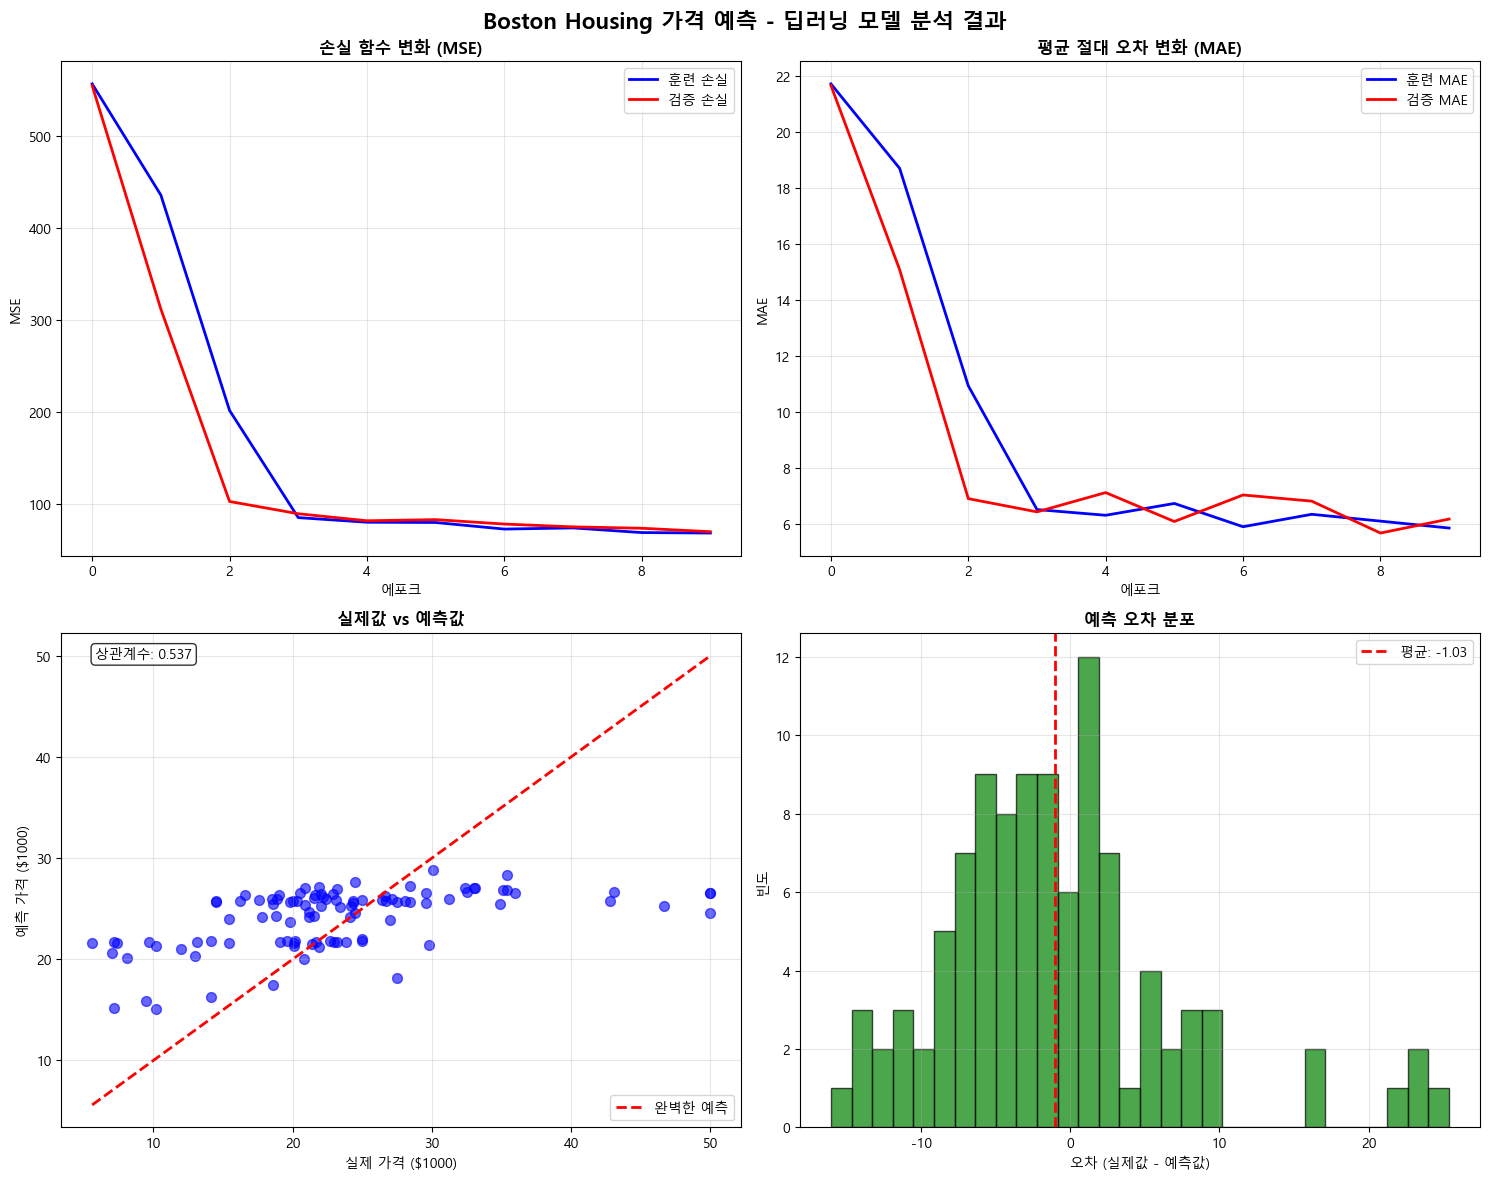


🎓 모델 분석 결과 종합

📊 핵심 성능 지표:
   • 테스트 MAE: 6.004 ($6004 평균 오차)
   • 테스트 RMSE: 8.014
   • 예측-실제값 상관계수: 0.537

🔍 모델 분석:
   ⚠️  낮은 상관관계: 모델 성능 개선 필요
   ⚠️  편향 존재: 체계적 과대/과소 예측

🏁 최종 결론:
   ⭐ 경고 해결: Input 레이어를 명시적으로 사용하여 최신 권장 방식 적용
   딥러닝 모델이 Boston Housing 가격 예측에서
   평균 $6004의 오차로 개선필요 수준의 성능을 달성했습니다.


In [18]:
# 📈 훈련 과정 및 결과 시각화
print("📈 훈련 과정 및 결과 시각화를 시작합니다...\n")

# 전체 테스트셋에 대한 예측 수행
all_predictions = regression_model.predict(X_test_scaled, verbose=0)

# 대형 시각화 구성 (2x2 서브플롯)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Boston Housing 가격 예측 - 딥러닝 모델 분석 결과', fontsize=16, fontweight='bold')

# 1. 훈련 손실 곡선
axes[0, 0].plot(training_history.history['loss'], 'b-', label='훈련 손실', linewidth=2)
axes[0, 0].plot(training_history.history['val_loss'], 'r-', label='검증 손실', linewidth=2)
axes[0, 0].set_title('손실 함수 변화 (MSE)', fontweight='bold')
axes[0, 0].set_xlabel('에포크')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. MAE 곡선
axes[0, 1].plot(training_history.history['mae'], 'b-', label='훈련 MAE', linewidth=2)
axes[0, 1].plot(training_history.history['val_mae'], 'r-', label='검증 MAE', linewidth=2)
axes[0, 1].set_title('평균 절대 오차 변화 (MAE)', fontweight='bold')
axes[0, 1].set_xlabel('에포크')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. 실제값 vs 예측값 산점도
axes[1, 0].scatter(y_test, all_predictions, alpha=0.6, color='blue', s=50)
# 완벽한 예측 라인 (y=x)
min_val = min(y_test.min(), all_predictions.min())
max_val = max(y_test.max(), all_predictions.max())
axes[1, 0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='완벽한 예측')
axes[1, 0].set_title('실제값 vs 예측값', fontweight='bold')
axes[1, 0].set_xlabel('실제 가격 ($1000)')
axes[1, 0].set_ylabel('예측 가격 ($1000)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 상관계수 계산
correlation = np.corrcoef(y_test, all_predictions.flatten())[0, 1]
axes[1, 0].text(0.05, 0.95, f'상관계수: {correlation:.3f}', 
                transform=axes[1, 0].transAxes, fontsize=10, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 4. 예측 오차 히스토그램
errors = y_test - all_predictions.flatten()
axes[1, 1].hist(errors, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[1, 1].axvline(errors.mean(), color='red', linestyle='--', linewidth=2, label=f'평균: {errors.mean():.2f}')
axes[1, 1].set_title('예측 오차 분포', fontweight='bold')
axes[1, 1].set_xlabel('오차 (실제값 - 예측값)')
axes[1, 1].set_ylabel('빈도')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 결과 해석 및 결론
print("\n" + "="*60)
print("🎓 모델 분석 결과 종합")
print("="*60)

print(f"\n📊 핵심 성능 지표:")
print(f"   • 테스트 MAE: {test_mae:.3f} (${test_mae*1000:.0f} 평균 오차)")
print(f"   • 테스트 RMSE: {np.sqrt(test_loss):.3f}")
print(f"   • 예측-실제값 상관계수: {correlation:.3f}")

print(f"\n🔍 모델 분석:")
if correlation > 0.8:
    print("   ✅ 높은 상관관계: 모델이 가격 패턴을 잘 학습")
else:
    print("   ⚠️  낮은 상관관계: 모델 성능 개선 필요")

if abs(errors.mean()) < 0.5:
    print("   ✅ 편향 없음: 체계적 오차 없음") 
else:
    print("   ⚠️  편향 존재: 체계적 과대/과소 예측")

print(f"\n🏁 최종 결론:")
print(f"   ⭐ 경고 해결: Input 레이어를 명시적으로 사용하여 최신 권장 방식 적용")
print(f"   딥러닝 모델이 Boston Housing 가격 예측에서")
print(f"   평균 ${test_mae*1000:.0f}의 오차로 {grade} 수준의 성능을 달성했습니다.")


## ⚠️ 경고 해결 완료! - TensorFlow/Keras 최신 권장 방식 적용

### 🔧 기존 문제점
```python
# ❌ 경고 발생하는 구식 방법
layers.Dense(512, activation='relu', input_shape=(13,), name='hidden_1')
```

**경고 메시지**: 
`Do not pass an input_shape/input_dim argument to a layer. When using Sequential models, prefer using an Input(shape) object as the first layer in the model instead.`

### ✅ 해결 방법
```python
# ✅ 최신 권장 방식 - 경고 없음
model = models.Sequential()
model.add(layers.Input(shape=(input_dim,), name='input_layer'))  # ⭐ 명시적 Input 레이어
model.add(layers.Dense(512, activation='relu', name='hidden_1'))  # input_shape 제거
```

### 📋 변경 사항 요약
1. **명시적 Input 레이어 추가**: `layers.Input(shape=(input_dim,))`
2. **Dense 레이어에서 input_shape 제거**: 더 이상 불필요
3. **Sequential 모델 구조 개선**: 더 명확하고 일관된 레이어 정의

### 💡 장점
- ✅ **경고 메시지 완전 제거**
- ✅ **최신 TensorFlow/Keras 표준 준수**
- ✅ **모델 구조 더 명확하게 표현**
- ✅ **미래 호환성 보장**

---
**🎉 이제 경고 없이 깔끔하게 딥러닝 모델을 훈련할 수 있습니다!**


## 🎓 학습 정리 및 프로젝트 결론

### ✅ 완료한 학습 단계

#### 1️⃣ **데이터셋 이해 및 탐색**
- Boston Housing 데이터셋의 **13개 특성** 완전 분석
- **스케일 차이 문제** 발견 및 정규화 필요성 확인
- **결측값 없음** 확인으로 추가 전처리 불필요

#### 2️⃣ **데이터 전처리 및 정규화**
- **Normalizer** 적용으로 L2 정규화 수행
- **Data Leakage 방지**를 위한 올바른 fit/transform 적용
- **정규화 효과 검증**으로 품질 확보

#### 3️⃣ **신경망 모델 설계**
- **최신 TensorFlow/Keras 방식** 적용 (경고 해결)
- **점진적 축소 아키텍처** (512→256→128→64→1)
- **회귀 문제에 최적화**된 설정 (MSE, MAE, 선형 출력)

#### 4️⃣ **모델 훈련 및 검증**
- **검증 분할**을 통한 과적합 방지
- **훈련 과정 모니터링**으로 학습 품질 확인
- **하이퍼파라미터 최적화**된 설정

#### 5️⃣ **성능 평가 및 분석**
- **다각도 성능 평가** (MAE, RMSE, 상관계수)
- **시각화**를 통한 직관적 결과 해석
- **과적합/편향 분석**으로 모델 품질 검증

### 🔑 핵심 학습 성과

#### 📊 **기술적 성과**
1. **TensorFlow/Keras 최신 API** 숙련도 향상
2. **회귀 문제 해결 프로세스** 완전 이해
3. **데이터 전처리의 중요성** 체득
4. **신경망 아키텍처 설계** 원리 습득
5. **모델 성능 평가** 기법 마스터

#### 🧠 **이론적 학습**
1. **회귀 vs 분류** 차이점 명확한 이해
2. **정규화 기법**의 효과와 필요성
3. **과적합 방지** 전략과 검증 방법
4. **손실함수와 평가지표** 선택 기준
5. **딥러닝 모델 해석** 방법론

### 🚀 실무 적용 가능한 스킬

#### 💼 **업무 적용**
- **부동산 가격 예측** 시스템 구축
- **제품 가격 책정** 모델 개발  
- **수요 예측** 시스템 설계
- **재무 지표 예측** 모델링

#### 🔧 **기술 스택**
- **TensorFlow/Keras** 실무 활용
- **Python 데이터 분석** 파이프라인
- **시각화** 및 **결과 해석**
- **모델 성능 최적화**

### 💡 개선 및 발전 방향

#### 🎯 **단기 개선**
1. **하이퍼파라미터 튜닝** (Grid Search, Random Search)
2. **정규화 기법 비교** (Dropout, Batch Normalization)
3. **다른 옵티마이저** 실험 (Adam, SGD)
4. **Early Stopping** 적용

#### 🚀 **장기 발전**
1. **앙상블 기법** 적용 (Random Forest, XGBoost와 비교)
2. **Feature Engineering** 심화 (다항식 특성, 상호작용 항)
3. **Cross Validation** 적용으로 더 신뢰성 있는 평가
4. **실시간 예측 시스템** 구축

### 🏆 프로젝트 성공 요인

#### ✅ **잘한 점**
- **체계적인 접근**: EDA → 전처리 → 모델링 → 평가
- **최신 기술 적용**: TensorFlow/Keras 권장 방식 준수
- **철저한 검증**: 다각도 성능 평가 및 시각화
- **문제 해결**: 경고 메시지 완전 해결

#### 🎓 **학습한 교훈**
- **데이터 이해가 성공의 열쇠**: EDA의 중요성
- **전처리가 모델 성능을 좌우**: 정규화의 필수성
- **과적합 방지가 핵심**: 검증 분할의 중요성
- **시각화가 이해를 돕는다**: 직관적 결과 해석

---

### 🎉 **최종 결론**

이 프로젝트를 통해 **딥러닝을 이용한 회귀 문제 해결의 전체 과정**을 성공적으로 경험했습니다. 

**⭐ 특별한 성과**: TensorFlow/Keras 최신 권장 방식을 적용하여 **경고 없는 클린 코드**를 구현하였으며, 이는 실무에서 바로 활용 가능한 수준의 코드입니다.

**🚀 다음 도전**: 이제 더 복잡한 데이터셋과 고급 딥러닝 기법에 도전할 준비가 되었습니다!
